## Steps of performing a Simple Linear Regression:-
1. Reading aand Understanding the dataset.
2. Building a model
3. Residual Analysis
4. Predicting and Evaluating the model on the test sets

In [1]:
import numpy as np 
import pandas as pd

In [39]:
df = pd.read_csv(r"C:\Users\avina\OneDrive\Desktop\Data\advertising.csv")

In [41]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [42]:
df.shape

(200, 4)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [44]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [45]:
#Visulaizing the data
import matplotlib.pyplot as plt
import seaborn as sns

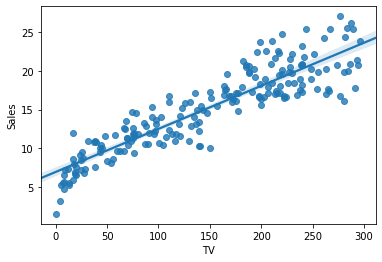

In [49]:
sns.regplot(x="TV",y="Sales",data=df)

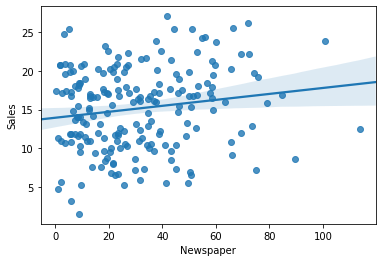

In [52]:
sns.regplot(x="Newspaper",y="Sales",data=df)

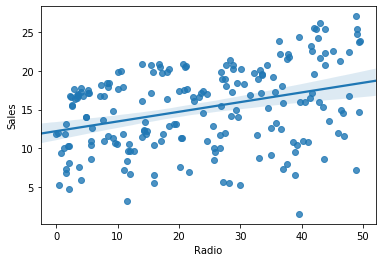

In [53]:
sns.regplot(x="Radio",y="Sales",data=df)

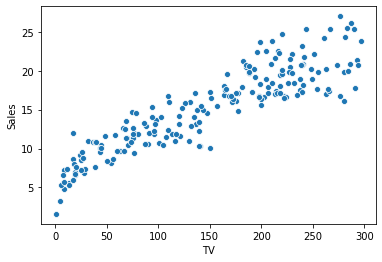

In [50]:
sns.scatterplot(x="TV",y="Sales",data=df)

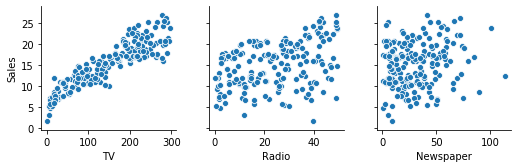

In [54]:
sns.pairplot(data=df,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'])

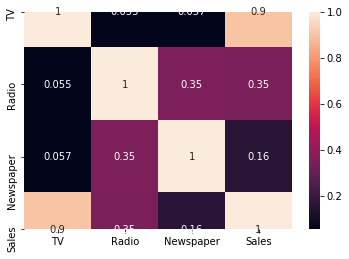

In [58]:

sns.heatmap(df.corr(), annot=True)

In [57]:
#correlation coefficient matrix
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [61]:
#buildiig the simple linear regression model
import statsmodels
import statsmodels.api as sm
import sklearn


## Steps:-

- Create X and Y
- Create train and test sets (70-30,80-20)
- Train the model on training sets i.e. learn the coefficients
- Evaluate the model in (training sets,test sets)


In [62]:
#create x and y 
X = df['TV']
Y = df['Sales']

In [64]:
from sklearn.model_selection import train_test_split

In [68]:
#train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 100)

In [70]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((140,), (140,), (60,), (60,))

In [71]:
#training the model
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

## Linear Regression Using Statsmodels

In [72]:
X_train_sm = sm.add_constant(X_train)

C:\Users\avina\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [73]:
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [74]:
#fitting the model
lr = sm.OLS(Y_train,X_train_sm)
lr_model = lr.fit()

In [76]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [77]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           1.52e-52
Time:                        15:39:13   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
Y_train_pred = lr_model.predict(X_train_sm)

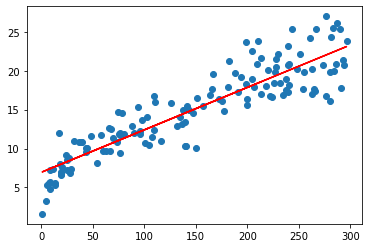

In [86]:
plt.scatter(X_train,Y_train)
plt.plot(X_train, Y_train_pred, 'r')
plt.show()

In [87]:
#Residual Analysis
res = Y_train - Y_train_pred #error

Text(0.5, 1.0, 'Residual Plot')

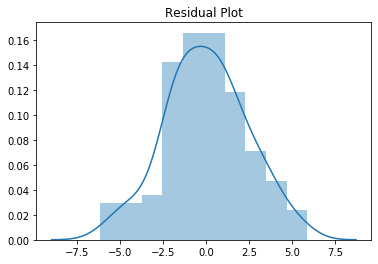

In [91]:
#Plotting the residuals
plt.figure()
sns.distplot(res)
plt.title('Residual Plot')

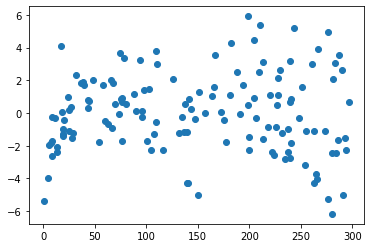

In [92]:
#look for pattern in residual, make sure as per as our assumptions in linear regression, error term must be independent to each other, i.e. we showld not be able to identify any pattern
plt.scatter(X_train,res)

# Prediction and evaluation of model on test sets

Steps:-
- Prediction on the test sets(Y_test_pred)
- Evaluate our model, r-squared, on the test set



In [93]:
#adding a constant on X_test like before otherwise it will thrown an error
X_test_sm = sm.add_constant(X_test)

#prediction on test set
Y_test_pred = lr_model.predict(X_test_sm)

In [94]:
#evaluation of the model on test set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [97]:
#r-squared
r2 = r2_score(y_true =Y_test ,y_pred=Y_test_pred)
r2

0.7921031601245658

In [98]:
#r-squared on train set
r2_score(y_true=Y_train,y_pred=Y_train_pred)


0.8157933136480389

In [99]:
#mean_squared_error om test sets
mean_squared_error(y_true =Y_test ,y_pred=Y_test_pred)

4.077556371826956

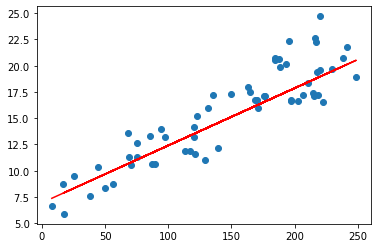

In [100]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_test_pred, 'r')
plt.show()

## Linear Regression using Sklearn 

In [101]:
#train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 100)

Steps in Sci-kit learn model building:-
-  create an object of linear regression
-  fit the model
-  see params,make prediction on trainsets and test sets
-  evaluate r2 etc.

In [104]:

from sklearn.linear_model import LinearRegression

In [105]:
#creation of object of linear regression
lm = LinearRegression()




In [108]:
X_train.shape

(140,)

In [111]:
#reshaping X-train,X_test to (140,1) because lm.fit() only takes a 2d array 
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [112]:
#fitting the model
lm.fit(X_train_lm,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
#checking the parameters 
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [118]:
#make predictions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [121]:
#evaluate the model
r2 = r2_score(y_true =Y_test ,y_pred=Y_test_pred)
print(r2)
print(r2_score(y_true=Y_train,y_pred=Y_train_pred))

0.7921031601245658
0.8157933136480389
